### Empirical Example for RobustiPY (Type 5)!

This example is designed to show how RobustiPy can be estimated with multiple dependent variables. In particular, it replicates the wonderful paper by [Amy Orben & Andrew K. Przybylski in Nature Human Behaviour, 2019](https://www.nature.com/articles/s41562-018-0506-1). Data comes from the UK Data Service [here](https://beta.ukdataservice.ac.uk/datacatalogue/series/series?id=2000031). Code comes from Amy's GitHub page, available [here](https://github.com/OrbenAmy/NHB_2019/tree/master).


In [1]:
import warnings
from copy import deepcopy

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec

from robustipy.figures import plot_bdist, plot_curve, plot_hexbin_r2
from robustipy.models import OLSRobust, stouffer_method
from robustipy.prototypes import MissingValueWarning
from robustipy.utils import concat_results


warnings.filterwarnings(
    action="ignore",
    category=MissingValueWarning,
    module=r"robustipy\.prototypes"
)

n_draws = 400
y_sample= 400

In [2]:
## lists of predictors
predictors = [
    ["fctvho00r"],
    ["fccomh00r"],
    ["fccmex00r"],
    ["fcinth00r"],
    ["fcsome00r"],
    ["tech"]
]
controls = [
    "edumot",
    "fd06e00",
    "clpar",
    "fcpaab00",
    "fpwrdscm",
    "fdacaq00",
    "fd05s00",
    "fpclsi00",
    "fpchti00",
    "fdkessl",
    "fdtots00",
    "foede000"
]

In [3]:
data = pd.read_csv('../data/nhb_2019/1_3_prep_mcs_data.csv', low_memory=False)

In [4]:
def patch_for_merge(results):
    n_specs = results.summary_df.shape[0]
    patched = deepcopy(results)
    x_label  = ", ".join(x) if isinstance(x, list) else str(x)
    y_labels = [f"composite_y_{i+1}" for i in range(n_specs)]
    if len(patched.all_b) == 1:
        patched.all_b = patched.all_b * n_specs
    if len(patched.all_p) == 1:
        patched.all_p = patched.all_p * n_specs
    patched.__dict__.pop("_y_name", None)
    patched.__dict__.pop("_x_name", None)
    patched.y_name = y_labels
    patched.x_name = [x_label] * n_specs
    patched.all_predictors = [x_label] * n_specs
    patched.specs_names = pd.Series(list(range(n_specs)))
    return patched

## No-Controls, participant

In [5]:
y = [
    "fcmdsa00r", "fcmdsb00r", "fcmdsc00r", "fcmdsd00r", "fcmdse00r", "fcmdsf00r",
    "fcmdsg00r", "fcmdsh00r", "fcmdsi00r", "fcmdsj00r", "fcmdsk00r", "fcmdsl00r",
    "fcmdsm00r", "fcsati00r", "fcgdql00r", "fcdowl00r", "fcvalu00r", "fcgdsf00r",
    "fcscwk00r", "fcwylk00r", "fcfmly00r", "fcfrns00r", "fcschl00r", "fclife00r"
]
merged_results = None
for x in predictors:
    model = OLSRobust(y=y, x=x, data=data)
    model.fit(
        controls=[],
        draws=n_draws,
        composite_sample=y_sample,
        rescale_x=True,
        rescale_z=True,
        kfold=10,
        oos_metric="rmse",
        seed=192735,
        n_cpu=20,
    )
    patched = patch_for_merge(model.get_results())
    if merged_results is None:
        merged_results = concat_results([patched], de_dupe=False)
    else:
        merged_results = concat_results([merged_results, patched], de_dupe=False)

Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fctvho00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fccomh00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fccmex00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fcinth00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fcsome00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is tech. Let's begin the calculations...


## Control, Participant

In [6]:
for x in predictors:
    model = OLSRobust(
        y=y,
        x=x + controls,
        data=data
    )
    model.fit(
        controls=[],
        draws=n_draws,
        composite_sample=y_sample,
        rescale_x=True,
        rescale_z=True,
        seed=192735,
        kfold=10,
        oos_metric="rmse",
        n_cpu=20,
    )
    patched = patch_for_merge(model.get_results())
    merged_results = concat_results([merged_results, patched], de_dupe=False)

Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fctvho00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fccomh00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fccmex00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fcinth00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fcsome00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is tech. Let's begin the calculations...


## No Controls, Primary carers

In [7]:
y = [
    "fpsdpf00", "fpsdro00", "fpsdhs00", "fpsdsr00", "fpsdtt00", "fpsdsp00",
    "fpsdor00", "fpsdmw00", "fpsdhu00", "fpsdfs00", "fpsdgf00", "fpsdfb00",
    "fpsdud00", "fpsdlc00", "fpsddc00", "fpsdnc00", "fpsdky00", "fpsdoa00",
    "fpsdpb00", "fpsdvh00", "fpsdst00", "fpsdcs00", "fpsdgb00", "fpsdfe00",
    "fpsdte00",
]

for x in predictors:
    model = OLSRobust(
        y=y,
        x=x,
        data=data
    )
    model.fit(
        controls=[],
        draws=n_draws,
        composite_sample=y_sample,
        rescale_x=True,
        rescale_z=True,
        seed=192735,
        kfold=10,
        oos_metric="rmse",
        n_cpu=20,
    )
    patched = patch_for_merge(model.get_results())
    merged_results = concat_results([merged_results, patched], de_dupe=False)

Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fctvho00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fccomh00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fccmex00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fcinth00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fcsome00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is tech. Let's begin the calculations...


## Controls, Primary Carers

In [8]:
for x in predictors:
    model = OLSRobust(
        y=y,
        x=x+controls,
        data=data
    )
    model.fit(
        controls=[],
        draws=n_draws,
        composite_sample=y_sample,
        rescale_x=True,
        rescale_z=True,
        seed=192735,
        kfold=10,
        oos_metric="rmse",
        n_cpu=20,
    )
    patched = patch_for_merge(model.get_results())
    merged_results = concat_results([merged_results, patched], de_dupe=False)

Calculating Composite Ys


Output()

Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fccomh00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fccmex00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fcinth00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is fcsome00r. Let's begin the calculations...


Calculating Composite Ys


Output()

OLSRobust is running with n_cpu=20, draws=400, folds=10, seed=192735.
We're evaluating our out-of-sample predictions with the rmse metric.
The estimand of interest is tech. Let's begin the calculations...


/home/jinx/anaconda3/lib/python3.12/site-packages/robustipy/figures.py:929: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


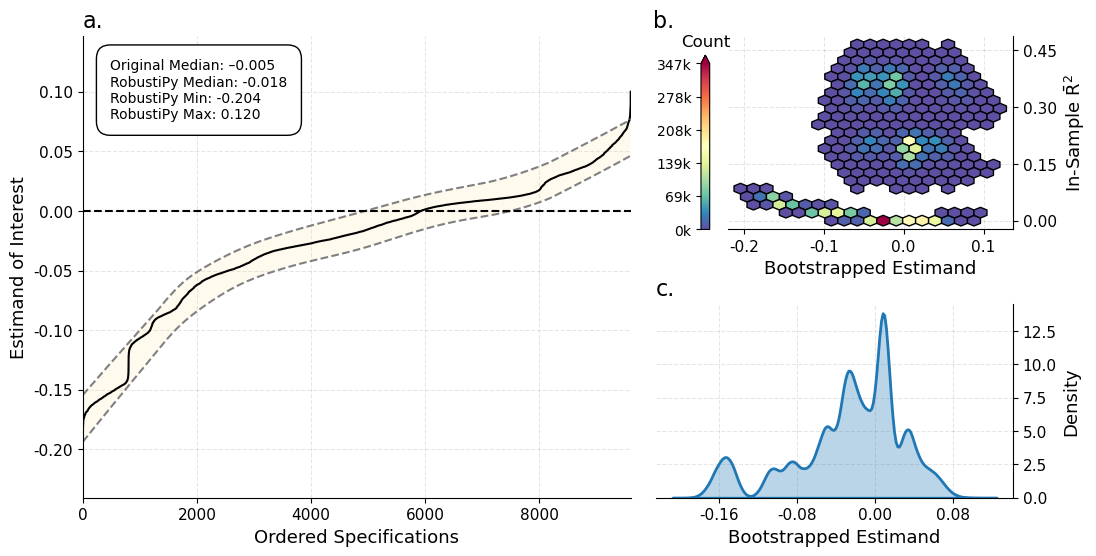

In [11]:
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="Ignoring `palette` because no `hue` variable has been assigned.",
        category=UserWarning,
    )
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(6, 24, wspace=-.25, hspace=5)
ax1 = fig.add_subplot(gs[0:6, 0:14])
ax2 = fig.add_subplot(gs[0:3, 15:24])
ax3 = fig.add_subplot(gs[3:6, 15:24])
plot_curve(results_object=merged_results, loess=True,
           ci=1, ax=ax1,
           title='a.', highlights=False, inset=False)
plot_hexbin_r2(merged_results, ax2, fig,
               colormap='Spectral_r', title='b.', side='right',
              oddsratio=False)
plot_bdist(results_object=merged_results,
           ax=ax3, oddsratio=False,
           title='c.', despine_left=True, highlights=False,
           legend_bool=False)


info_text = (
    f'Original Median: –0.005\n'
    f'RobustiPy Median: {merged_results.estimates.stack().median():.3f}\n'
    f'RobustiPy Min: {merged_results.estimates.stack().min():.3f}\n'
    f'RobustiPy Max: {merged_results.estimates.stack().max():.3f}'
)
ax1.text(0.05, 0.95, info_text, transform=ax1.transAxes, va='top', ha='left',
         fontsize=10, color='black', bbox=dict(facecolor='white',
                                           edgecolor='black', boxstyle='round,pad=1'));
plt.savefig("../figures/nhb_2019/nhb_2019.pdf", bbox_inches='tight')
plt.savefig("../figures/nhb_2019/nhb_2019.png", bbox_inches='tight', dpi=400)
plt.savefig("../figures/nhb_2019/nhb_2019.svg", bbox_inches='tight')

In [12]:
merged_results_v2 = pd.DataFrame({
    'betas': [b[0][0] for b in merged_results.all_b],
    'p_values': [p[0][0] for p in merged_results.all_p],
})

In [13]:
print(merged_results.estimates.min().min())
print(merged_results.estimates.max().max())
print(merged_results.estimates.stack().median())
print(merged_results_v2['betas'].min())
print(merged_results_v2['betas'].max())
print(merged_results_v2['betas'].median())
print(merged_results.summary_df.av_k_metric.min())
print(merged_results.summary_df.av_k_metric.max())
print(stouffer_method(merged_results_v2['p_values']))

-0.2041342159517579
0.12039892098668402
-0.01770233484483366
-0.18095648486355317
0.09984424130555679
-0.018271108475041088
0.37667643820353086
0.7743555454641923
(472.7185790437354, 0.0)
